# 데이터 불러오기

In [ ]:
! pip3 install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
application_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Application.csv"
company_fund_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/CompanyFund.csv"
job_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Job.csv"

In [ ]:
application_df = pd.read_csv(application_path)
application_df.head(2)

,Unnamed: 0,cdate,company_uuid,job_uuid,user_uuid,application_uuid
0,0,2017-02-25 23:45:01,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,b0329bd7-fc45-4e83-993a-b73bd9d3549c,59c42363-f764-4cbd-aafd-20eb663ea5d7
1,1,2020-11-23 14:46:07.329731,f6156b12-d4d7-469f-84be-31799c765211,e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f,b0329bd7-fc45-4e83-993a-b73bd9d3549c,425db0e8-87f8-4b4d-8248-7f24c31d49d3


In [ ]:
company_fund_df = pd.read_csv(company_fund_path)
company_fund_df.head(2)

,Unnamed: 0,fund_date,round_type,raised,currency,company_uuid
0,0,2015-01-15,Seed,0,KRW,2bf21122-15b6-4e6e-ae32-6e25968246f6
1,1,2016-05-31,Seed,0,KRW,2bf21122-15b6-4e6e-ae32-6e25968246f6


In [ ]:
job_df = pd.read_csv(job_path)
job_df.head(2)

,Unnamed: 0,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid
0,0,2020-11-25 10:32:10,2020-11-25 10:32:10,SW 개발,"신입,경력,인턴",NaN,2020-11-25,1,0,764292b0-53f8-4f14-ac83-6eafc7a6a18d,daa34559-fc42-47f6-b5c6-cc6171404f37
1,1,2020-12-03 16:24:16,2020-12-03 16:24:16,HW 개발,인턴,2020-12-03,2020-12-04,1,0,b2b598d6-9ca3-4eb4-ac9c-bb57a6dad2ad,daa34559-fc42-47f6-b5c6-cc6171404f37


# 투자 관련 주제

## 투자 단계별 채용 전략 차이 분석

- Seed vs Series A vs Series B 등 단계별 채용 수/패턴 비교
    - 채용공고의 수, 포지션 특성, 원격근무 여부, 경력 요건, 연봉 공개 비율 등의 차이 분석

### 전처리

In [ ]:
# 데이터 병합
job_fund_df = job_df.merge(company_fund_df, on="company_uuid", how="left")

# 날짜 타입 변환
job_fund_df["start_date"] = pd.to_datetime(job_fund_df["start_date"], errors='coerce')
job_fund_df["fund_date"] = pd.to_datetime(job_fund_df["fund_date"], errors='coerce')

# 투자 이후 채용공고 필터링
post_funding_jobs = job_fund_df[job_fund_df["start_date"] >= job_fund_df["fund_date"]]

post_funding_jobs.head(2)

,Unnamed: 0_x,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid,Unnamed: 0_y,fund_date,round_type,raised,currency
37,37,2019-06-20 08:27:03,2019-06-20 08:27:03,디자인,"신입,경력,인턴",2019-06-20,2019-07-14,0,0,05e4982d-7a29-4971-8375-83a9755760d9,fc49d453-50f9-4703-b89a-97150831af1a,6375.0,2018-06-27,투자 단계 비공개,0.0,KRW
38,38,2019-06-23 09:42:14,2019-06-23 09:42:14,마케팅,"신입,경력,인턴",2019-06-23,2019-07-14,1,0,956ebb3f-de17-49c4-96e2-efbcdd938253,fc49d453-50f9-4703-b89a-97150831af1a,6375.0,2018-06-27,투자 단계 비공개,0.0,KRW


### 투자 단계별 채용 공고 수

In [ ]:
job_count_by_stage = post_funding_jobs["round_type"].value_counts().sort_index()
job_count_by_stage

,count
round_type,
Angel,5891
Pre-IPO,30
Seed,21561
Series A,14302
Series B,3184
Series C,251
Series D,42
투자 단계 비공개,54109
해당없음,4329


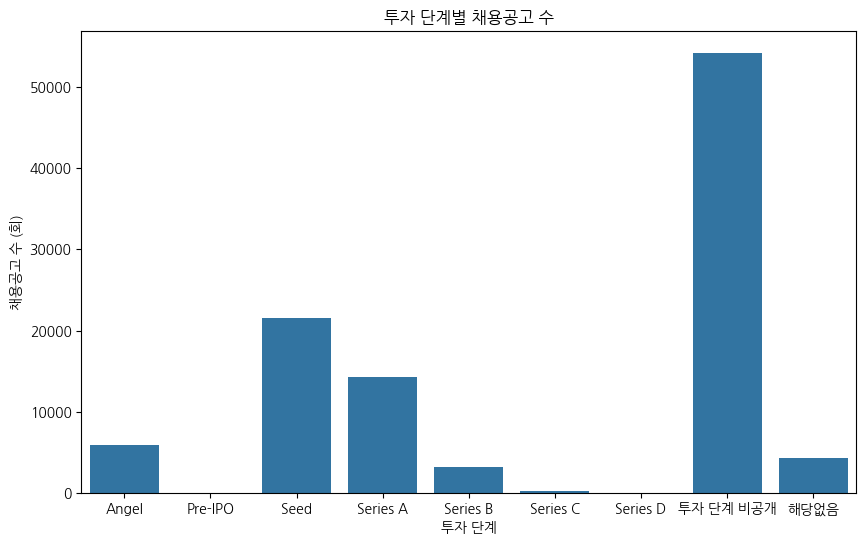

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=job_count_by_stage.index, y=job_count_by_stage.values)
plt.title("투자 단계별 채용공고 수")
plt.ylabel("채용공고 수 (회)")
plt.xlabel("투자 단계")
plt.show()

### 경력 조건 비율

In [ ]:
# 경력 조건
def parse_experience(x):
    if "경력" in x and "신입" not in x:
        return "경력 (%)"
    elif "신입" in x and "경력" not in x:
        return "신입 (%)"
    elif "신입" in x and "경력" in x:
        return "신입+경력 (%)"
    elif "인턴" in x:
        return "인턴 (%)"
    else:
        return "기타 (%)"

job_fund_df["career_type"] = job_fund_df["career_type_string"].apply(parse_experience)

In [ ]:
career_summary = job_fund_df.groupby(["round_type", "career_type"]).size().unstack(fill_value=0)
career_summary["총합"] = career_summary.sum(axis=1)

# 비율 계산
career_ratio = career_summary.div(career_summary["총합"], axis=0).drop(columns="총합")
career_ratio

career_type,경력 (%),신입 (%),신입+경력 (%),인턴 (%)
round_type,,,,
Angel,0.515748,0.049069,0.397638,0.037546
Pre-IPO,0.602230,0.007435,0.379182,0.011152
Seed,0.502881,0.045639,0.417951,0.033529
Series A,0.577887,0.046272,0.332947,0.042894
Series B,0.551852,0.043474,0.357939,0.046735
Series C,0.554096,0.075672,0.320200,0.050031
Series D,0.500000,0.105820,0.351852,0.042328
투자 단계 비공개,0.545745,0.046529,0.370614,0.037113
해당없음,0.519973,0.052929,0.385375,0.041722


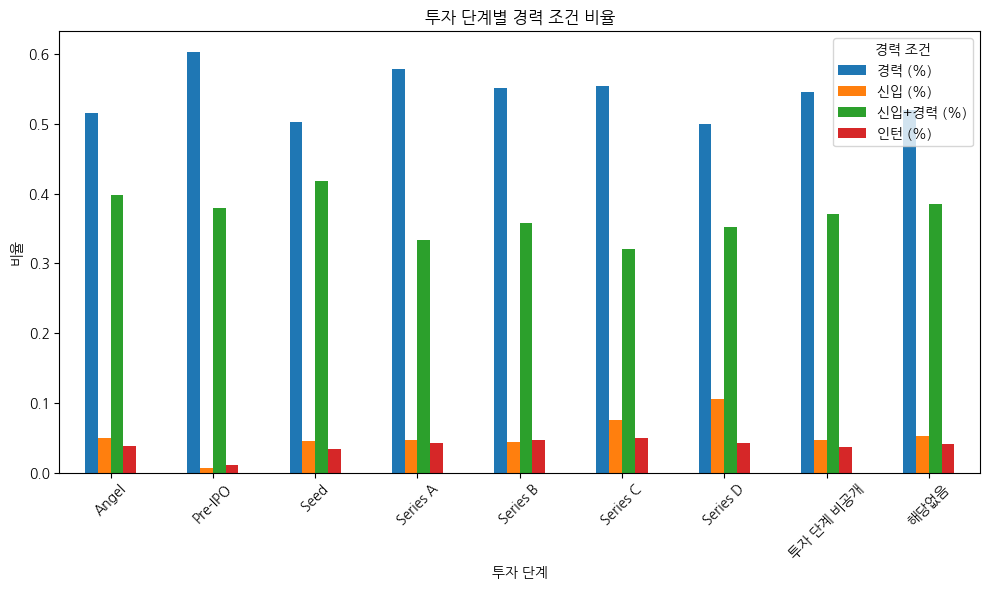

In [ ]:
career_ratio.plot(kind="bar", figsize=(10, 6))
plt.title("투자 단계별 경력 조건 비율")
plt.ylabel("비율")
plt.xlabel("투자 단계")
plt.legend(title="경력 조건")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 원격 근무 가능 비율

In [ ]:
remote_ratio = post_funding_jobs.groupby("round_type")["allow_remote"].mean()
remote_ratio

,allow_remote
round_type,
Angel,0.076727
Pre-IPO,0.300000
Seed,0.092018
Series A,0.062439
Series B,0.048053
Series C,0.055777
Series D,0.119048
투자 단계 비공개,0.077658
해당없음,0.105567


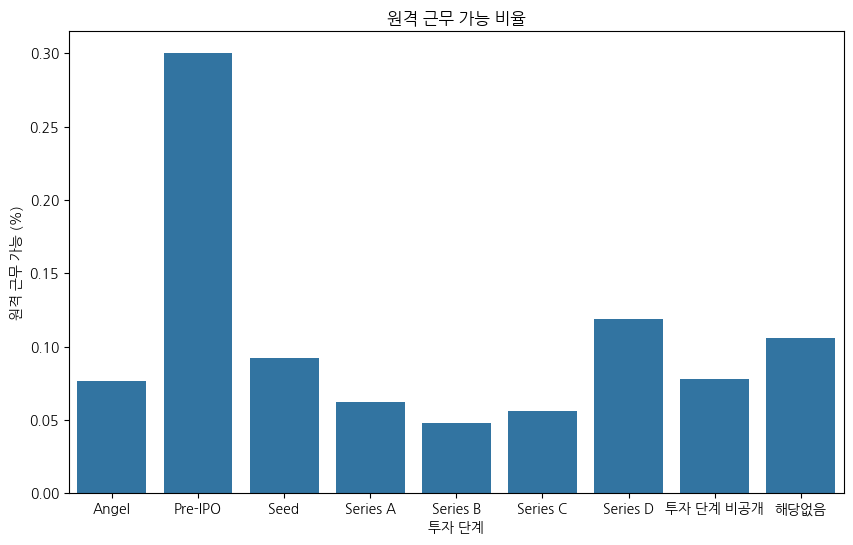

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_ratio.index, y=remote_ratio.values)
plt.title("원격 근무 가능 비율")
plt.ylabel("원격 근무 가능 (%)")
plt.xlabel("투자 단계")
plt.show()

### 연봉 공개 비율

In [ ]:
salary_open_ratio = post_funding_jobs.groupby("round_type")["can_show_salary"].mean()
salary_open_ratio

,can_show_salary
round_type,
Angel,0.719233
Pre-IPO,0.900000
Seed,0.669913
Series A,0.439309
Series B,0.305590
Series C,0.386454
Series D,0.595238
투자 단계 비공개,0.577593
해당없음,0.534997


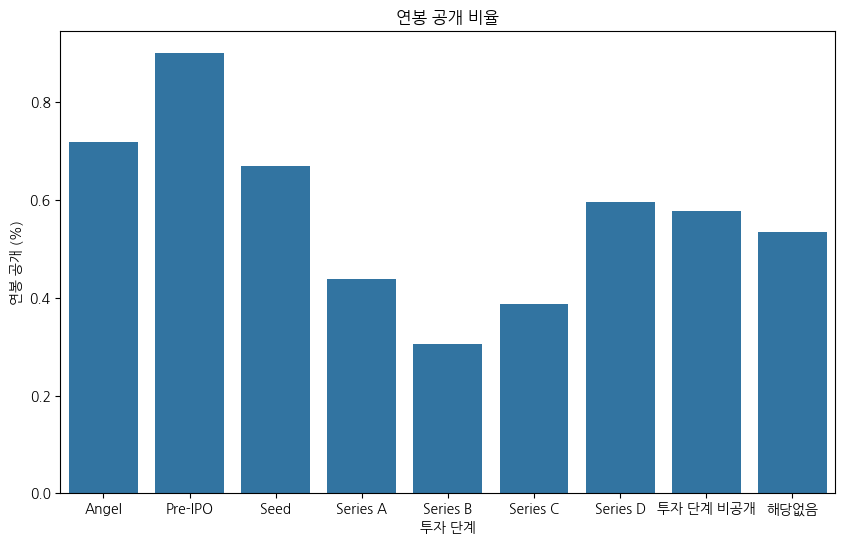

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_open_ratio.index, y=salary_open_ratio.values)
plt.title("연봉 공개 비율")
plt.ylabel("연봉 공개 (%)")
plt.xlabel("투자 단계")
plt.show()

### 채용 공고 수명 주기

In [ ]:
post_funding_jobs["end_date"] = pd.to_datetime(post_funding_jobs["end_date"], errors="coerce")

<ipython-input-17-e38b48938ed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_funding_jobs["end_date"] = pd.to_datetime(post_funding_jobs["end_date"], errors="coerce")


In [ ]:
post_funding_jobs["end_date"] = pd.to_datetime(post_funding_jobs["end_date"])
post_funding_jobs["공고_기간"] = (post_funding_jobs["end_date"] - post_funding_jobs["start_date"]).dt.days

lifecycle_by_stage = post_funding_jobs.groupby("round_type")["공고_기간"].mean()
lifecycle_by_stage

<ipython-input-18-19cfc8419cfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_funding_jobs["end_date"] = pd.to_datetime(post_funding_jobs["end_date"])
<ipython-input-18-19cfc8419cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_funding_jobs["공고_기간"] = (post_funding_jobs["end_date"] - post_funding_jobs["start_date"]).dt.days


,공고_기간
round_type,
Angel,43.772604
Pre-IPO,31.100000
Seed,41.467081
Series A,46.481494
Series B,50.909692
Series C,42.390438
Series D,42.833333
투자 단계 비공개,42.782047
해당없음,48.197642


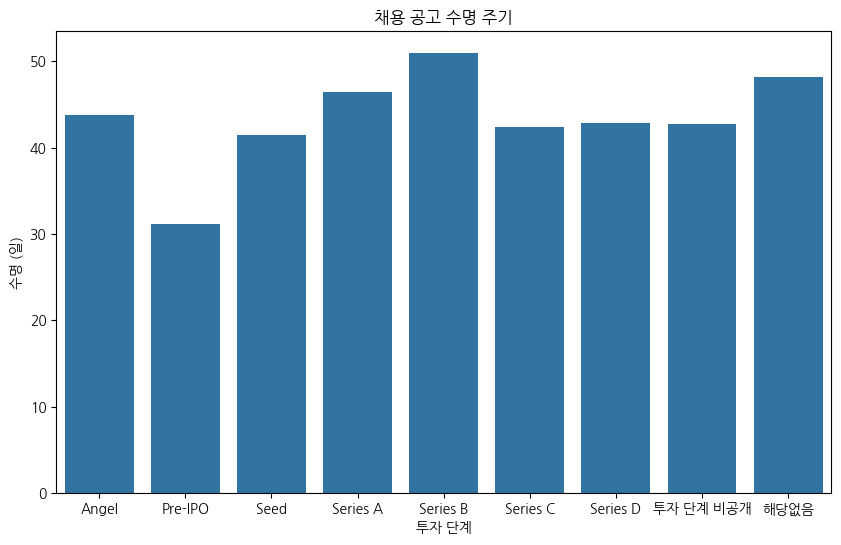

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=lifecycle_by_stage.index, y=lifecycle_by_stage.values)
plt.title("채용 공고 수명 주기")
plt.ylabel("수명 (일)")
plt.xlabel("투자 단계")
plt.show()

## 투자 직후 채용 증가 여부 분석

- 투자일 이후 일정 기간 동안의 공고 수 증가 여부

### 투자 시점 기준 데이터 조인

In [ ]:
# 조인 전 날짜 타입 변환
company_fund_df["fund_date"] = pd.to_datetime(company_fund_df["fund_date"], errors="coerce")
job_df["start_date"] = pd.to_datetime(job_df["start_date"], errors="coerce")

# 투자 이후 3개월 이내 공고만 따로 보기 위해 조인
after_fund_df = pd.merge(job_df, company_fund_df, on="company_uuid", how="inner")

# 투자 전후 여부 컬럼 생성
after_fund_df["days_from_funding"] = (after_fund_df["start_date"] - after_fund_df["fund_date"]).dt.days
after_fund_df["funding_phase"] = after_fund_df["days_from_funding"].apply(
    lambda x: "이전" if x < 0 else ("이후(3개월)" if x <= 90 else "이후(3개월 이상)")
)

after_fund_df.head(2)

,Unnamed: 0_x,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid,Unnamed: 0_y,fund_date,round_type,raised,currency,days_from_funding,funding_phase
0,37,2019-06-20 08:27:03,2019-06-20 08:27:03,디자인,"신입,경력,인턴",2019-06-20,2019-07-14,0,0,05e4982d-7a29-4971-8375-83a9755760d9,fc49d453-50f9-4703-b89a-97150831af1a,6375,2018-06-27,투자 단계 비공개,0,KRW,358.0,이후(3개월 이상)
1,38,2019-06-23 09:42:14,2019-06-23 09:42:14,마케팅,"신입,경력,인턴",2019-06-23,2019-07-14,1,0,956ebb3f-de17-49c4-96e2-efbcdd938253,fc49d453-50f9-4703-b89a-97150831af1a,6375,2018-06-27,투자 단계 비공개,0,KRW,361.0,이후(3개월 이상)


### 투자 전후 채용 공고 수 비교

In [ ]:
# 투자 전 3개월 vs 투자 후 3개월의 채용공고 수 비교

def get_3m_range(date):
    return date - pd.DateOffset(months=3), date + pd.DateOffset(months=3)

job_counts = after_fund_df[after_fund_df["funding_phase"].isin(["이전", "이후(3개월)"])] \
    .groupby(["round_type", "funding_phase"]).size().unstack().fillna(0)

# 비율 변화 보기
job_counts["증가율"] = (job_counts["이후(3개월)"] - job_counts["이전"]) / job_counts["이전"] * 100
job_counts

funding_phase,이전,이후(3개월),증가율
round_type,,,
Angel,865,342,-60.462428
Pre-IPO,105,1,-99.047619
Seed,3135,1421,-54.673046
Series A,5662,1431,-74.726245
Series B,3562,318,-91.072431
Series C,545,21,-96.146789
Series D,177,6,-96.610169
투자 단계 비공개,15057,3591,-76.150628
해당없음,1308,383,-70.718654


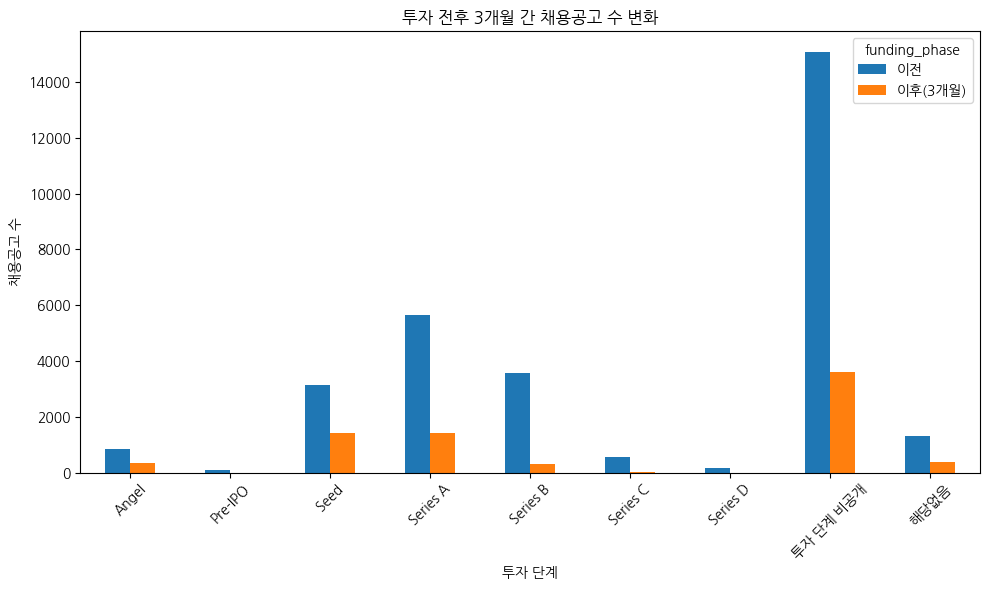

In [ ]:
job_counts[["이전", "이후(3개월)"]].plot(kind="bar", figsize=(10, 6))
plt.title("투자 전후 3개월 간 채용공고 수 변화")
plt.ylabel("채용공고 수")
plt.xlabel("투자 단계")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

before = after_fund_df[after_fund_df["funding_phase"] == "이전"].groupby("company_uuid").size()
after = after_fund_df[after_fund_df["funding_phase"] == "이후(3개월)"].groupby("company_uuid").size()

t_stat, p_val = ttest_ind(before, after, equal_var=False)
print(f"t-test 결과: t = {t_stat:.2f}, p-value = {p_val:.4f}")

t-test 결과: t = 10.75, p-value = 0.0000


- 그래프 상에서는 투자 이후 채용 공고 수가 줄어들었는데
- t-test 결과로는 t 값이 증가하여 투자 이후 채용 공고 수가 유의미하게 늘어났다고 해석됨
    - 데이터 집계 시 이전 기간을 전체 누적, 이후 기간을 3개월 제한으로 집계 -> 그럼 당연히 이후가 작아짐 = 잘못된 비교 방식

### 수정

In [ ]:
# 3개월 전후 기간 라벨링
def label_phase(row):
    fund_date = row["fund_date"]
    start_date = row["start_date"]

    if pd.isna(fund_date) or pd.isna(start_date):
        return None

    before, after = fund_date - pd.DateOffset(months=3), fund_date + pd.DateOffset(months=3)
    if before <= start_date < fund_date:
        return "이전"
    elif fund_date < start_date <= after:
        return "이후(3개월)"
    else:
        return None

job_fund_df["funding_phase"] = job_fund_df.apply(label_phase, axis=1)

# 투자단계별 집계: 이전 vs 이후
after_fund_df = job_fund_df.dropna(subset=["funding_phase", "round_type"])

job_counts = after_fund_df[after_fund_df["funding_phase"].isin(["이전", "이후(3개월)"])] \
    .groupby(["round_type", "funding_phase"]) \
    .size().unstack().fillna(0)

# 증가율 계산
job_counts["증가율"] = (job_counts["이후(3개월)"] - job_counts["이전"]) / job_counts["이전"] * 100

job_counts

funding_phase,이전,이후(3개월),증가율
round_type,,,
Angel,190,337,77.368421
Pre-IPO,4,1,-75.000000
Seed,811,1405,73.242910
Series A,979,1395,42.492339
Series B,217,312,43.778802
Series C,27,19,-29.629630
Series D,2,6,200.000000
투자 단계 비공개,2361,3538,49.851758
해당없음,199,373,87.437186


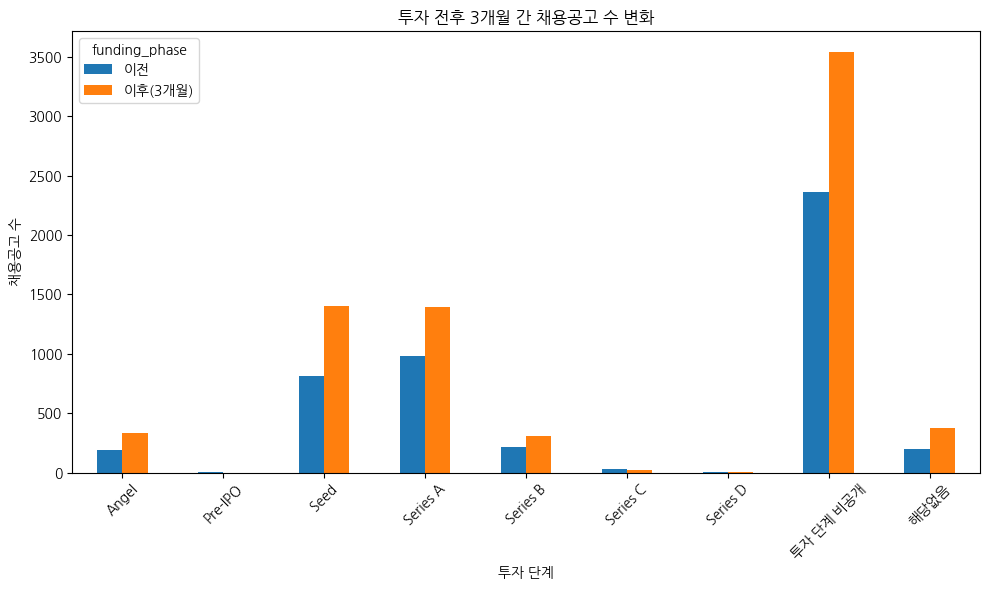

In [ ]:
job_counts[["이전", "이후(3개월)"]].plot(kind="bar", figsize=(10, 6))
plt.title("투자 전후 3개월 간 채용공고 수 변화")
plt.ylabel("채용공고 수")
plt.xlabel("투자 단계")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

before = after_fund_df[after_fund_df["funding_phase"] == "이전"].groupby("company_uuid").size()
after = after_fund_df[after_fund_df["funding_phase"] == "이후(3개월)"].groupby("company_uuid").size()

t_stat, p_val = ttest_ind(before, after, equal_var=False)
print(f"t-test 결과: t = {t_stat:.2f}, p-value = {p_val:.4f}")

t-test 결과: t = -0.61, p-value = 0.5443


- p-value > 0.05 -> 통계적으로 유의미하지 않다
    - 투자 전 후 3개월 사이의 채용 공고 수 변화는 유의미하지 않다.

## 투자 단계별 실제 지원자 수

<ipython-input-36-f89ba8751f37>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fund_support_count, x="application_count", y="round_type", palette="viridis")


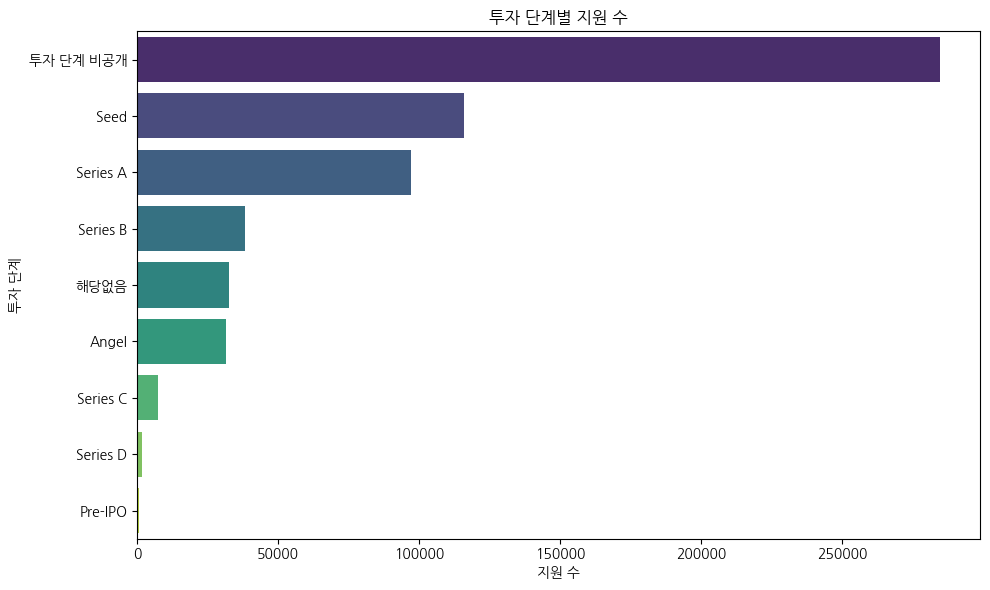

In [ ]:
# application_df에서 company_uuid 제거 후 병합
app_with_job = pd.merge(application_df.drop(columns=["company_uuid"], errors="ignore"), job_df[["job_uuid", "company_uuid"]], on="job_uuid", how="left")

# 2. 회사 투자 정보 병합
app_with_fund = pd.merge(app_with_job, company_fund_df[["company_uuid", "round_type"]], on="company_uuid", how="left")

# 3. 투자 정보 없는 행 제거
app_with_fund = app_with_fund.dropna(subset=["round_type"])

# 4. 투자 단계별 지원 수 집계
fund_support_count = app_with_fund["round_type"].value_counts().reset_index()
fund_support_count.columns = ["round_type", "application_count"]
fund_support_count = fund_support_count.sort_values("application_count", ascending=False)

# 5. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=fund_support_count, x="application_count", y="round_type", palette="viridis")
plt.title("투자 단계별 지원 수")
plt.xlabel("지원 수")
plt.ylabel("투자 단계")
plt.tight_layout()
plt.show()